In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta, datetime
from time import strftime

import acquire

### Using your store items data

In [3]:
# Load store data
df = acquire.get_store_data()

# Print the shape of the df
print(df.shape)

# Quick view of the df
df.head()

(913000, 14)


,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1. Convert date column to datetime format.

In [5]:
# The current date format
df.sale_date.head() # dtype is string

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [6]:
# Convert to datetime
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

# Print the dtypes of the columns
df.dtypes # datetime64

sale_amount                  float64
sale_date        datetime64[ns, GMT]
sale_id                        int64
store_address                 object
store_city                    object
store_id                       int64
store_state                   object
store_zipcode                  int64
item_brand                    object
item_id                        int64
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
dtype: object

### 2. Plot the distribution of sale_amount and item_price.

[Text(0.5, 1.0, 'ditribution of item price')]

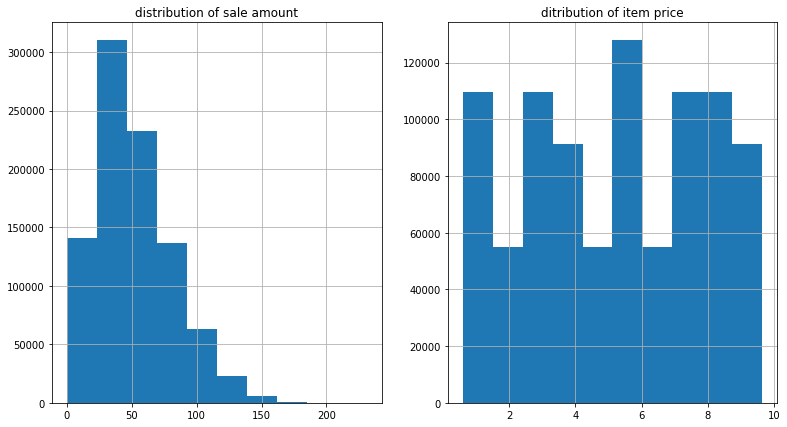

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,7))

df.sale_amount.hist(ax=ax1)
ax1.set(title='distribution of sale amount')

df.item_price.hist(ax=ax2)
ax2.set(title='ditribution of item price')

### 3. Set the index to be the datetime variable.

In [17]:
df = df.set_index('sale_date').sort_index()
print(df.shape)
df.head(3)

(913000, 13)


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [22]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

# Print the shape of df
print(df.shape)

df.head()

(913000, 15)


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [24]:
df['sales_total'] = df.sale_amount * df.item_price

# Print the shape
print(df.shape)

(913000, 16)


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [25]:
def prep_store(store):
    store.sale_date = pd.to_datetime(store.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    store = store.set_index('sale_date').sort_index()
    store['month'] = store.index.month
    store['day_of_week'] = store.index.day_name()
    store['sales_total'] = store.sale_amount * store.item_price
    return store

In [26]:
# Test the function
# Acquire store data

store = acquire.get_store_data()
print(store.shape)

# Prepare store data
store = prep_store(store)
print(store.shape)

store.head(3)

(913000, 14)
(913000, 16)


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55


In [28]:
# Shoulde be identify with df.head(3)
df.head(3)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55


### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [6]:
# Acquire opsd germany daily
df = acquire.get_opsd_germany()

# Print the shape
print(df.shape)

# Quick view of df
df.head()

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [7]:
# Print dtypes
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [9]:
df.Date = pd.to_datetime(df.Date)
df.dtypes # dtype is datetime

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

### 2. Plot the distribution of each of your variables.

In [13]:
# Print out the columns
df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

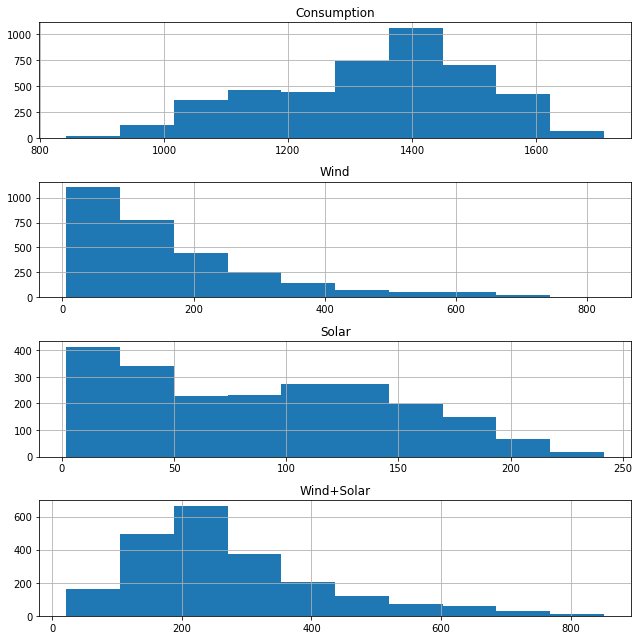

In [18]:
fig, axs = plt.subplots(4 ,1, figsize=(9,9))

for ax, col in zip(axs, ['Consumption', 'Wind', 'Solar', 'Wind+Solar']):
    df[col].hist(ax=ax)
    ax.set(title=col)
plt.tight_layout()

### 3. Set the index to be the datetime variable.

In [19]:
df = df.set_index('Date').sort_index()
print(df.shape)
df.head()

(4383, 4)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.

In [20]:
df['month'] = df.index.month
df['year'] = df.index.year

print(df.shape)
df.head()

(4383, 6)


,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### 5. Fill any missing values.
Fill null with 0

In [22]:
# Compute the total number of missing values in each column

df.isnull().sum(axis=0)

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [24]:
# Print out the columns
df.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month', 'year'], dtype='object')

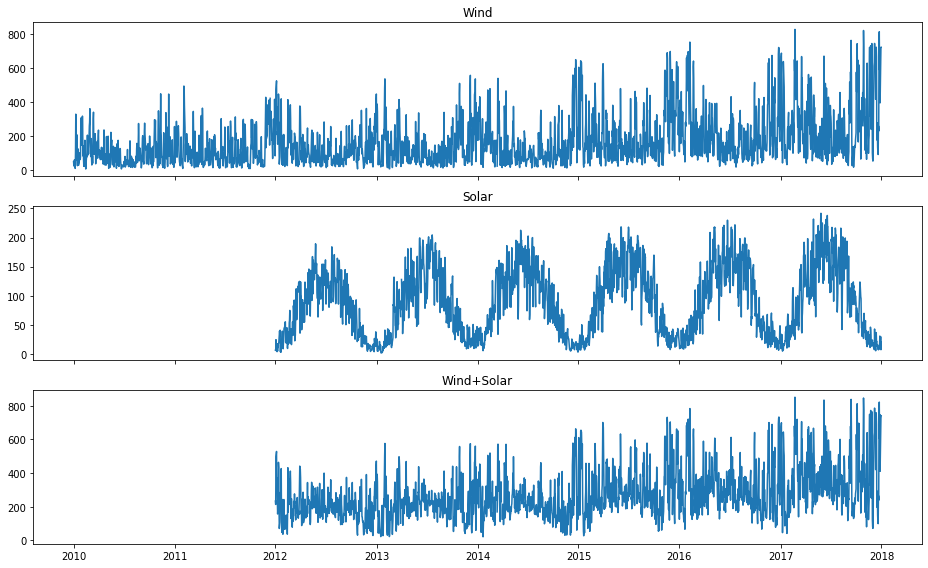

In [27]:
# Plot the distribution over time

fig, axs = plt.subplots(3, 1, figsize=(13, 8), sharex=True)

for ax, col in zip(axs, ['Wind', 'Solar', 'Wind+Solar']):
    ax.plot(df.index, df[col])
    ax.set(title=col)
plt.tight_layout()

**Takeaways**
1. Can't simply impute by mean or median.
2. Solar data has a pattern that change little over time.
3. Wind + Solar = Wind + Solar

In [ ]:
df.fillna(0, inplace=True)

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [1]:
def prep_ops(ops):
    ops.Date = pd.to_datetime(ops.Date) # Convert to datetime 
    ops = ops.set_index('Date').sort_index() # Set Date as index
    ops['month'] = ops.index.month
    ops['year'] = ops.index.year
    ops.fillna(0, inplace=True)
    return ops